### Model Comparison Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_data = pd.read_csv('comparison_data.csv',index_col=0)

In [3]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.rc('axes', labelsize=20)

In [4]:
our_model_vec = []
baseline_vec = []
for i in range(5):
    our_model_vec.append(df_data[df_data['rock_type'] == df_data['best_model_'+str(i)]].groupby('rock_type')['best_model_'+str(i)].count()/df_data['rock_type'].value_counts()[0])

    baseline_vec.append(df_data[df_data['rock_type'] == df_data['baseline_'+str(i)]].groupby('rock_type')['baseline_'+str(i)].count()/df_data['rock_type'].value_counts()[0])

expert = df_data[df_data['rock_type'] == df_data['pred_app_16021807']].groupby('rock_type')['pred_app_16021807'].count()/df_data['rock_type'].value_counts()[0] * 100

baseline_vec = np.array(baseline_vec) * 100
our_model_vec = np.array(our_model_vec) * 100

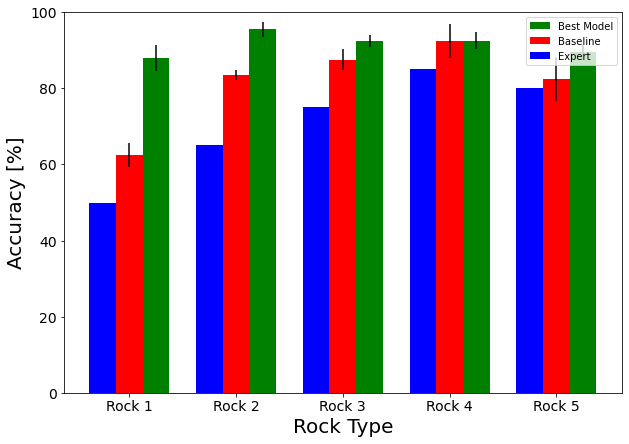

In [13]:
#time_str = 

# # # Figure per rock type 

labels = ['Rock 1','Rock 2','Rock 3','Rock 4','Rock 5']

fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(len(labels))
bar_width = 0.25
ax.bar(index+bar_width+bar_width/2, 
                height=np.array(our_model_vec).mean(axis=0),
                yerr=np.array(our_model_vec).std(axis=0),
                width=bar_width, 
                color='g',
                label='Best Model')

ax.bar(index+bar_width/2, height=np.array(baseline_vec).mean(axis=0), 
                yerr=np.array(baseline_vec).std(axis=0),
                width=bar_width, 
                color='r',
                label='Baseline')
ax.bar(index-bar_width/2, 
                height=expert, 
                width=bar_width,
                color='b',
                label='Expert')
ax.set_xlabel('Rock Type')
ax.set_ylabel('Accuracy [%]')
ax.set_ylim(0,100)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('model_comparison_rock.png',dpi=600,bbox_inches='tight')

In [10]:
mean_vec = [expert.mean(),
            np.array(baseline_vec).mean(axis=1).mean(),
            np.array(our_model_vec).mean(axis=1).mean()]

std_vec = [0,
            np.array(baseline_vec).mean(axis=1).std(),
            np.array(our_model_vec).mean(axis=1).std()]

models = ['Expert','Baseline','Best model']

Print mean accuracies and standard deviation

In [11]:
for i in range(3):
    print(f'{models[i]} : {mean_vec[i]} +/- {round(std_vec[i],2)}')

Expert : 71.0 +/- 0
Baseline : 81.7 +/- 1.63
Best model : 91.6 +/- 0.58


In [12]:
time_model = df_data[['best_model_time_0','best_model_time_1','best_model_time_2','best_model_time_3','best_model_time_4']].sum().mean()

time_expert = df_data['time_app_16021807'].sum()

In [17]:
print('Time expert [s] :',np.round(time_model,2))
print('Time model [s] :',time_expert)

print('Time gains [x] :',np.round(time_expert/time_model,2))
print('Accuracy gains [x]', np.round(mean_vec[0]/mean_vec[2],2))

Time expert [s] : 1.38
Time model [s] : 626.76
Time gains [x] : 455.75
Accuracy gains [x] 0.78


In [22]:
200 - 200*0.71

58.0

In [24]:
58/16.799999999999983

3.452380952380956

In [23]:
200 - 200*0.916

16.799999999999983